## EDA

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com 
### Date: Oct.20th, 2023

###

### Table of Contents
- [Data Import](#Data-Import)
- [Distributions and Graphs](#Distributions-and-Graphs)
- [Dig in Data](#Dig-in-data)
- [Correlation](#Correlation)

###

### Data Import

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import tsa
import statsmodels.api as sm

In [4]:
import pyarrow.parquet as pq

df = pd.read_parquet('IowaAfterClean3.parquet')

# Now, df contains the data from the Parquet file
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
#run this code to see all columns
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [7]:
#Now our clean dataset has 2805303 rows and 23 columns
df.shape

(2805303, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [9]:
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06
mean,4.117789e+03,5.124372e+04,5.712634e+01,1.055997e+06,2.871833e+02,5.456070e+04,1.194263e+01,8.218059e+02,1.122082e+01,1.698818e+01,1.185837e+01,1.624491e+02,9.380025e+00,2.473141e+00
std,1.273784e+03,9.906393e+02,2.732932e+01,1.039516e+05,1.415585e+02,9.184738e+04,7.846288e+00,5.254817e+02,1.093199e+01,1.654621e+01,3.566819e+01,5.871845e+02,4.120797e+01,1.088602e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011000e+06,3.300000e+01,2.580000e+02,1.000000e+00,2.000000e+01,6.600000e-01,9.900000e-01,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.637000e+03,5.031400e+04,3.100000e+01,1.012100e+06,2.050000e+02,2.712500e+04,6.000000e+00,3.750000e+02,6.470000e+00,9.000000e+00,3.000000e+00,4.200000e+01,1.500000e+00,3.900000e-01
50%,4.162000e+03,5.104000e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.991600e+04,1.200000e+01,7.500000e+02,8.750000e+00,1.349000e+01,6.000000e+00,8.892000e+01,4.500000e+00,1.180000e+00
75%,5.239000e+03,5.230200e+04,7.700000e+01,1.062500e+06,4.200000e+02,6.525100e+04,1.200000e+01,1.000000e+03,1.350000e+01,2.100000e+01,1.200000e+01,1.665000e+02,1.050000e+01,2.770000e+00
max,9.049000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.999950e+05,1.200000e+02,5.250000e+03,2.098940e+03,3.148410e+03,1.320000e+04,2.509320e+05,1.320000e+04,3.487070e+03


In [10]:
df.nunique()

invoice_and_item_number    2805303
date                           326
store_number                  1929
store_name                    1952
address                       1936
city                           442
zip_code                       479
county_number                   99
county                          99
category                        47
category_name                   47
vendor_number                  222
vendor_name                    222
item_number                   4543
item_description              4029
pack                            21
bottle_volume_ml                25
state_bottle_cost             1287
state_bottle_retail           1315
bottles_sold                   397
sale_dollars                 11136
volume_sold_liters             761
volume_sold_gallons            761
dtype: int64

### 

To expedite code execution without introducing bias, we recommend obtaining a random sample (50K) from 'df4'. This approach ensures efficiency while maintaining the integrity of the dataset.

In [11]:
subset_df = df.sample(n=50000, random_state=42)

In [12]:
subset_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1418613,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,Carroll,1081400.0,American Schnapps,55.0,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,5.16,7.74,2,15.48,0.08,0.02
2429266,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,Mills,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,1750,11.50,17.25,6,103.50,10.50,2.77
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,Madison,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10628,Canadian Club Whisky,6,1750,14.50,21.75,6,130.50,10.50,2.77
2252745,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,Carroll,1071100.0,Cocktails /RTD,308.0,Mango Bottling,71529,Tooters Ala Bama Slama,12,375,8.75,9.00,4,36.00,1.50,0.39
695507,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,Guthrie,1081400.0,American Schnapps,421.0,SAZERAC COMPANY INC,84207,99 Root Beer Mini,10,50,5.16,7.74,10,77.40,0.50,0.13


###

### Distributions and Graphs

#### Distribution of Categorical Variables

In [14]:
# Convert the 'date' column to datetime
subset_df['date'] = pd.to_datetime(subset_df['date'])

subset_df['day'] = subset_df['date'].dt.day
subset_df['month'] = subset_df['date'].dt.month
subset_df['week'] = subset_df['date'].dt.week

subset_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_14724\1301467074.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  subset_df['week'] = subset_df['date'].dt.week


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,day,month,week
1418613,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,Carroll,1081400.0,American Schnapps,55.0,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,5.16,7.74,2,15.48,0.08,0.02,22,4,16
2429266,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,Mills,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,1750,11.50,17.25,6,103.50,10.50,2.77,13,10,41
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,Madison,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10628,Canadian Club Whisky,6,1750,14.50,21.75,6,130.50,10.50,2.77,17,11,46
2252745,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,Carroll,1071100.0,Cocktails /RTD,308.0,Mango Bottling,71529,Tooters Ala Bama Slama,12,375,8.75,9.00,4,36.00,1.50,0.39,12,5,19
695507,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,Guthrie,1081400.0,American Schnapps,421.0,SAZERAC COMPANY INC,84207,99 Root Beer Mini,10,50,5.16,7.74,10,77.40,0.50,0.13,9,12,49


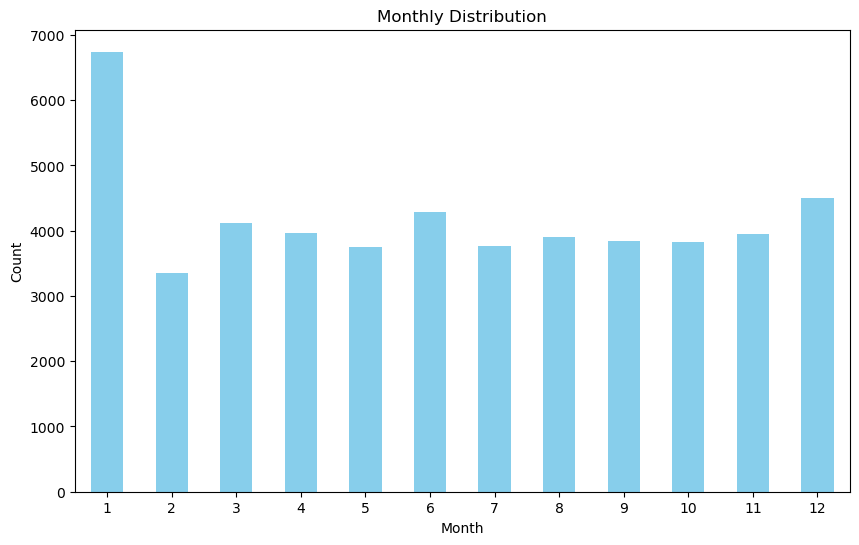

In [15]:
# Monthly distribution
monthly_distribution = subset_df.groupby('month').size()
plt.figure(figsize=(10, 6))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution')
plt.xticks(rotation=0)
plt.show()

The graph reveals notable trends in monthly order frequencies. January emerges as the month with the highest frequency, aligning seamlessly with the dataset's timeframe spanning from January 2021 to January 2022. In contrast, February records the lowest frequency, potentially attributed to its shorter duration of 28 days in the year 2021. These patterns offer valuable insights into the temporal dynamics of alcohol purchases.

This pattern could suggest some form of seasonality, particularly if the peaks in January and December correspond to seasonal events (like holidays or sales periods) that are known to affect whatever metric "Count" is tracking. The substantial drop in February might also be significant if it is linked to seasonal behavior.

###

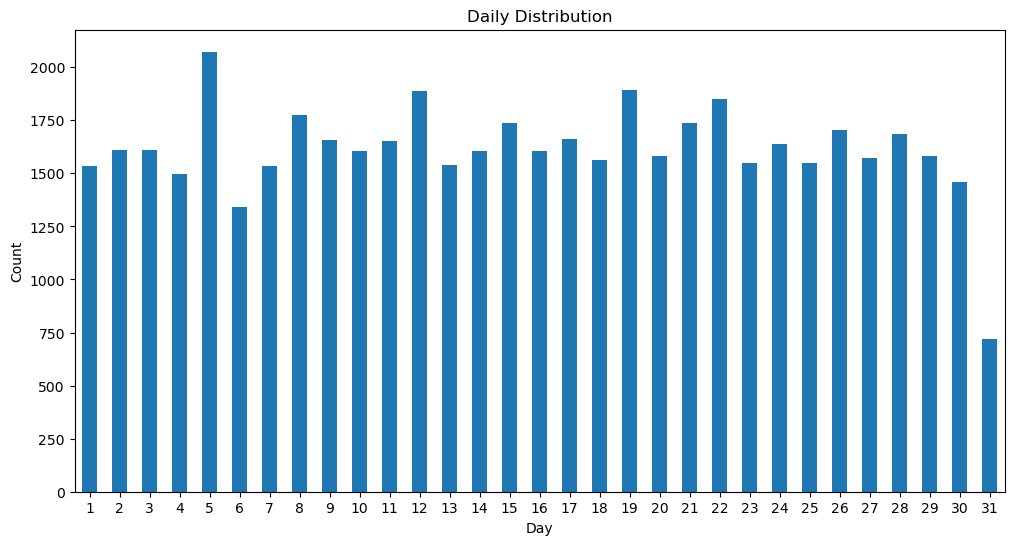

In [16]:
# Daily distribution
daily_distribution = subset_df.groupby('day').size()
plt.figure(figsize=(12, 6))
daily_distribution.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Daily Distribution')
plt.xticks(rotation=0)
plt.show()

The graph unveils an intriguing pattern: the 31st of the month exhibits the lowest frequency of orders. This suggests a potential customer behavior trend, indicating a reluctance to purchase alcohol towards the end of the month. Alternatively, it could signify a strategic choice by store owners to limit operations on the 31st, aligning with this observed decrease in sales activity

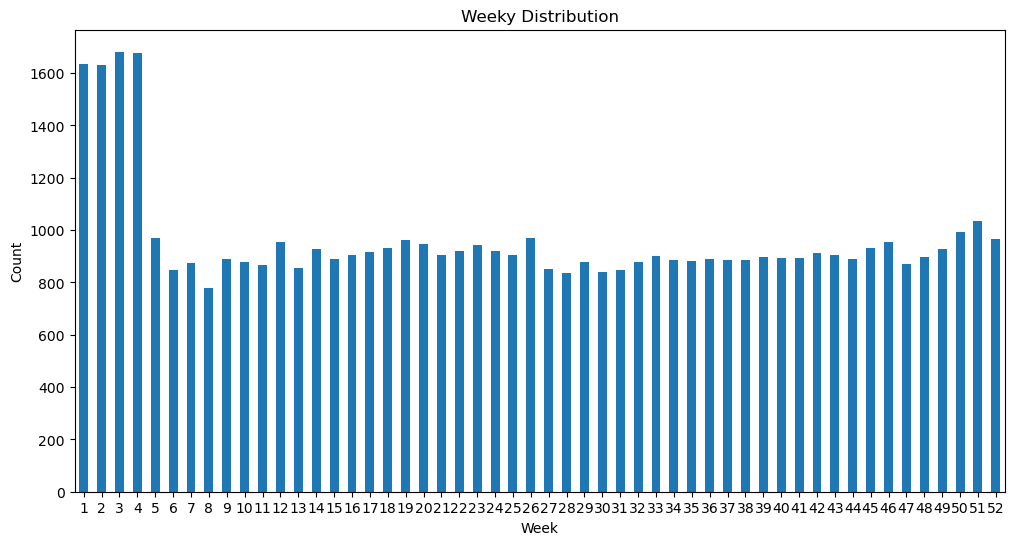

In [17]:
Weeky_distribution = subset_df.groupby('week').size()
plt.figure(figsize=(12, 6))
Weeky_distribution.plot(kind='bar')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Weeky Distribution')
plt.xticks(rotation=0)
plt.show()

###

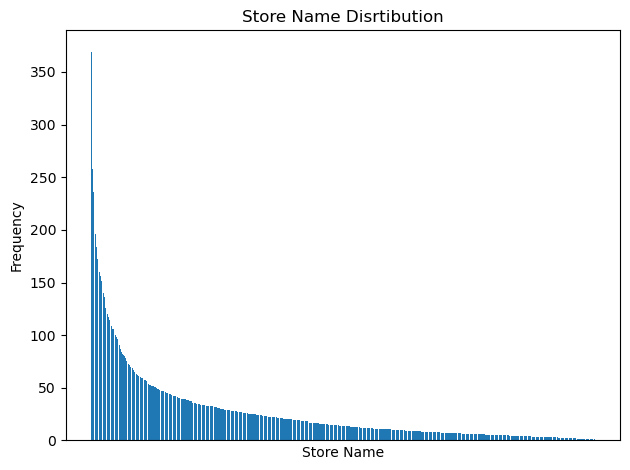

In [18]:
store_name_counts = subset_df['store_name'].value_counts()

plt.figure()
plt.bar(store_name_counts.index, store_name_counts.values)
plt.xlabel('Store Name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Store Name Disrtibution')
plt.tight_layout()
plt.show()

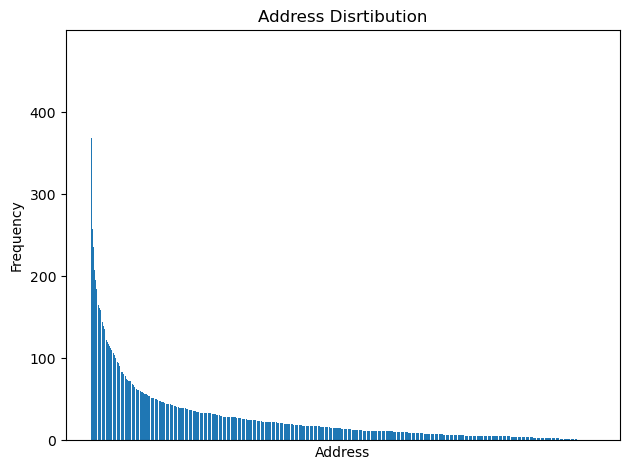

In [19]:
address_counts = subset_df['address'].value_counts()

plt.figure()
plt.bar(address_counts.index, address_counts.values)
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Address Disrtibution')
plt.tight_layout()
plt.show()

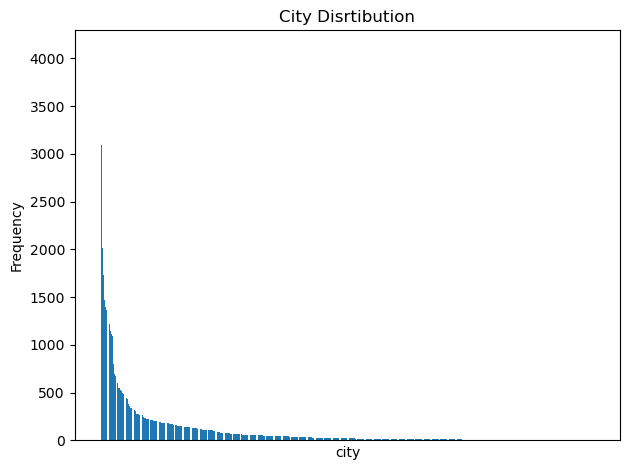

In [20]:
city_counts = subset_df['city'].value_counts()

plt.figure()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('city')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('City Disrtibution')
plt.tight_layout()
plt.show()

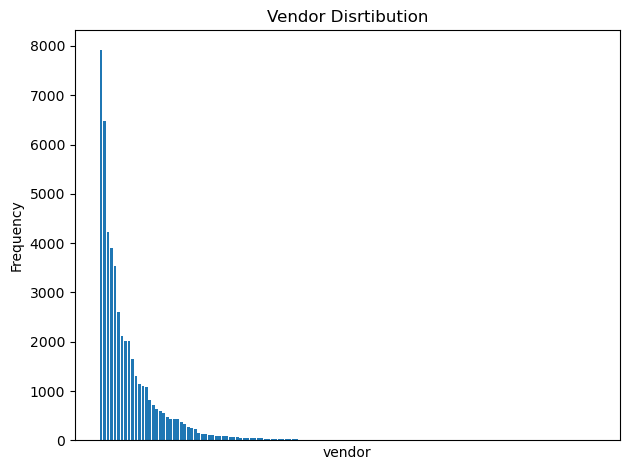

In [29]:
vendor_name_counts = subset_df['vendor_name'].value_counts()

plt.figure()
plt.bar(vendor_name_counts.index, vendor_name_counts.values)
plt.xlabel('vendor')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Vendor Disrtibution')
plt.tight_layout()
plt.show()

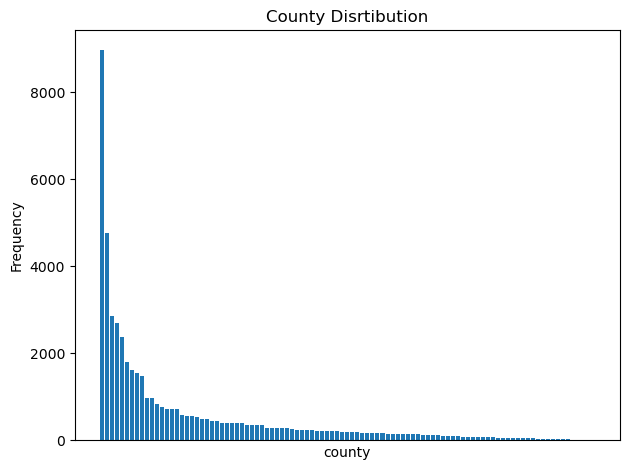

In [21]:
county_counts = subset_df['county'].value_counts()

plt.figure()
plt.bar(county_counts.index, county_counts.values)
plt.xlabel('county')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('County Disrtibution')
plt.tight_layout()
plt.show()

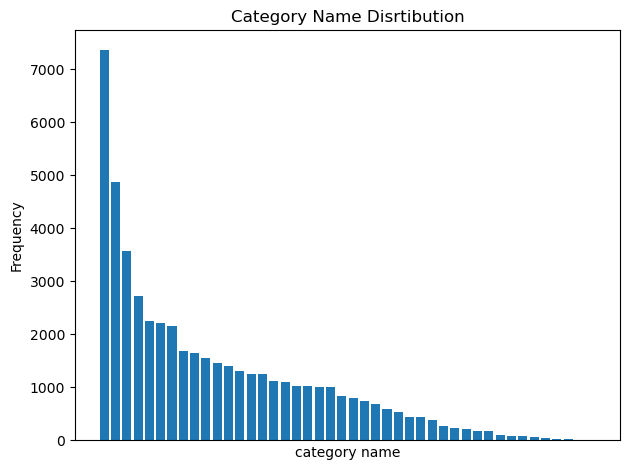

In [22]:
category_name_counts = subset_df['category_name'].value_counts()

plt.figure()
plt.bar(category_name_counts.index, category_name_counts.values)
plt.xlabel('category name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Category Name Disrtibution')
plt.tight_layout()
plt.show()

###

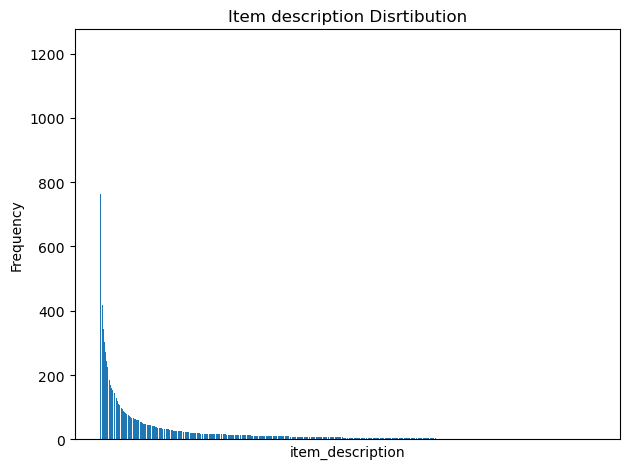

In [23]:
item_description_counts = subset_df['item_description'].value_counts()

plt.figure()
plt.bar(item_description_counts.index, item_description_counts.values)
plt.xlabel('item_description')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Item description Disrtibution')
plt.tight_layout()
plt.show()

###

#### Distribution of Numerical Variables

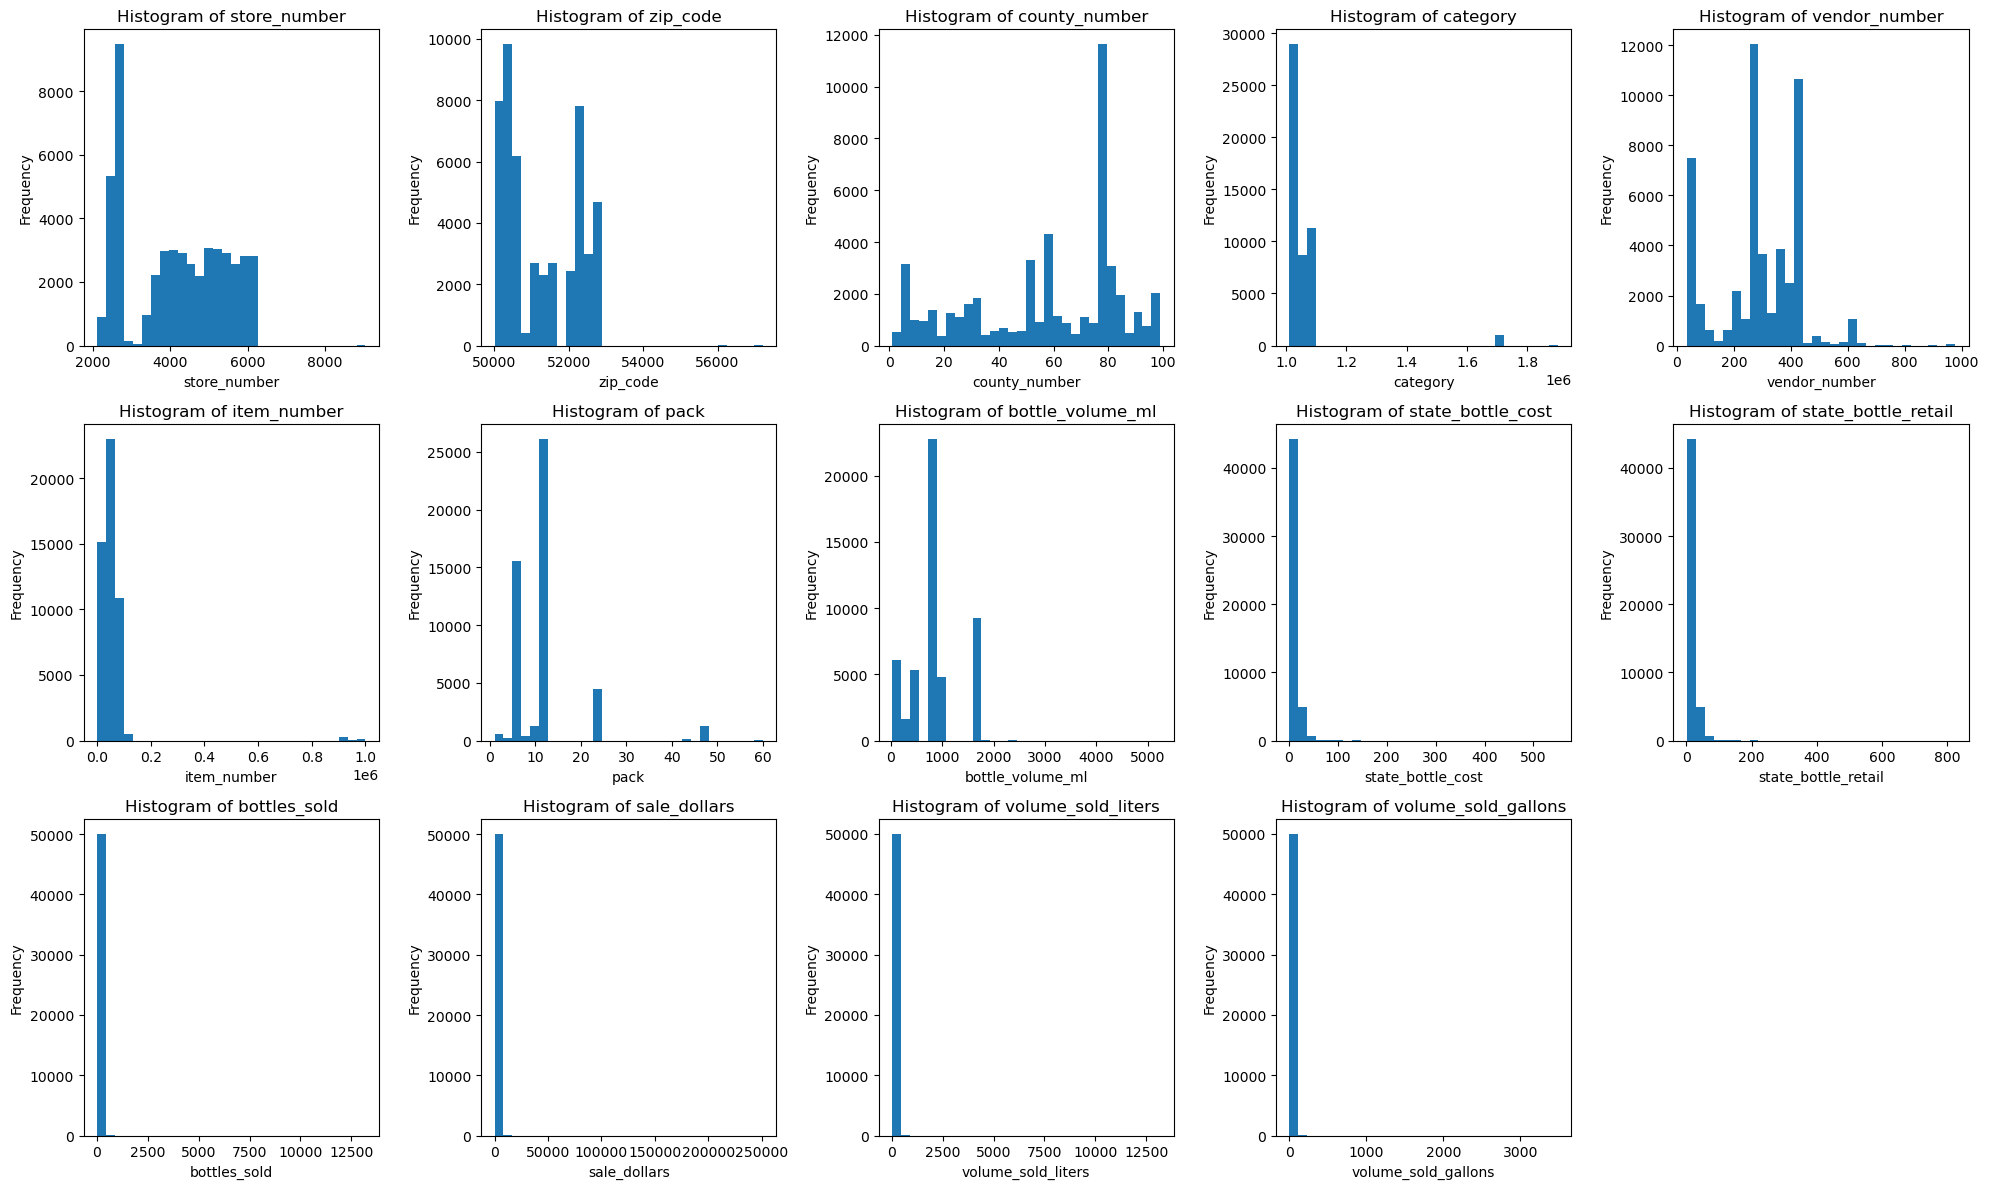

In [101]:
numeric_columns = subset_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
num_cols = 5
num_rows, remainder = divmod(len(numeric_columns), num_cols)
num_rows += int(remainder > 0)  

# Create subplots for numeric columns (3x5 grid)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Plot histograms for numeric columns
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(subset_df[column].dropna(), bins=30)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Hide any remaining empty subplots (if any)
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

The graphs exhibit uneven distribution, displaying pronounced tails that suggest the presence of potential outliers in some cases

###

### Dig in data

#### Category VS Sales

In [24]:
category_sales = subset_df.groupby('category_name')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_categories = category_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 Liquor Categories by Total Sales:")
print(top_10_categories)

Top 10 Liquor Categories by Total Sales:
category_name
American Vodka               1412098.65
Canadian Whiskies            1022775.41
Straight Bourbon Whiskies     650160.39
Whiskey Liqueur               470971.31
100% Agave Tequila            457961.36
Spiced Rum                    418839.31
Imported Brandies             309371.63
Tennessee Whiskies            281263.07
Imported Vodka                265794.09
Blended Whiskies              227548.12
Name: sale_dollars, dtype: float64


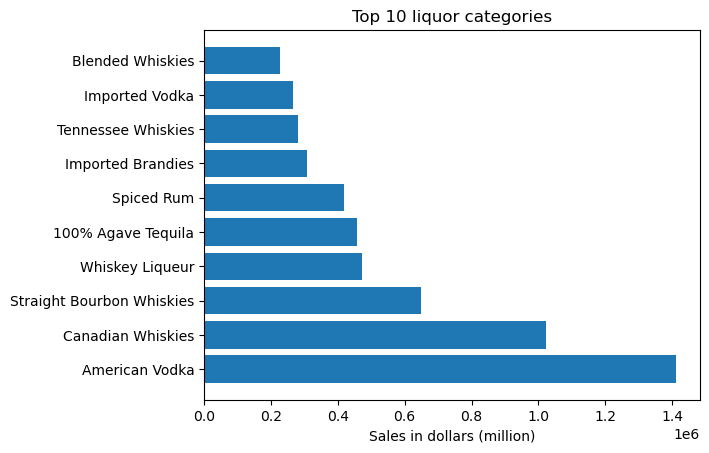

In [25]:
plt.figure()
plt.barh(top_10_categories.index, top_10_categories.values)  
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)') 
plt.yticks(rotation=0)
plt.show()

### 

We would like to see the descending order.

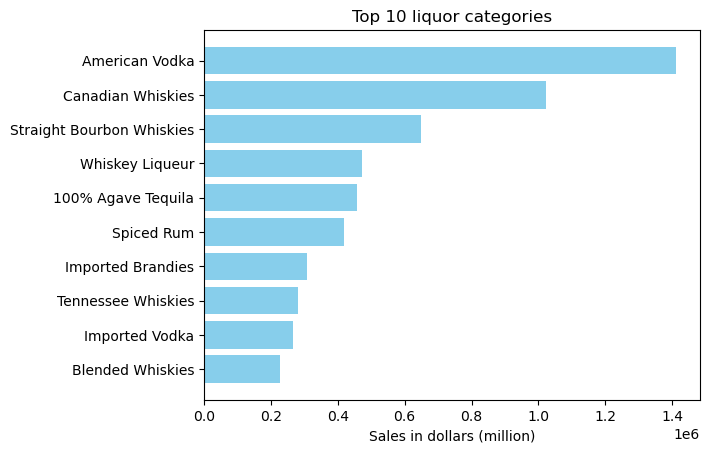

In [26]:
sorted_categories = top_10_categories.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_categories.index[::-1], sorted_categories.values[::-1], color='skyblue') 
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

In [27]:
Bottom_10_categories = category_sales.sort_values(ascending=False).tail(10)

# Print the top 10 categories and their total sales
print("Bottom 10 Liquor Categories by Total Sales:")
print(Bottom_10_categories)

Bottom 10 Liquor Categories by Total Sales:
category_name
Aged Dark Rum                  21940.92
Gold Rum                       17640.38
Triple Sec                     15677.81
Special Order Items            15321.00
Corn Whiskies                  11244.88
Bottled in Bond Bourbon        10846.66
Flavored Gin                    9791.84
Mezcal                          8400.55
Distilled Spirits Specialty      910.00
American Sloe Gins               463.41
Name: sale_dollars, dtype: float64


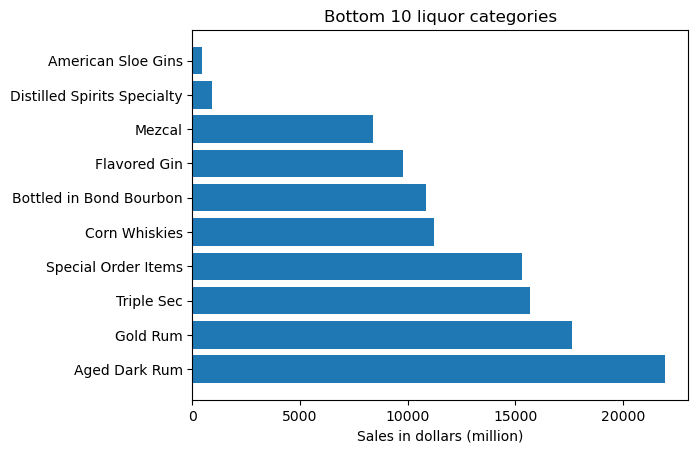

In [28]:
plt.figure()
plt.barh(Bottom_10_categories.index, Bottom_10_categories.values)  # Use barh for horizontal bar chart
plt.title('Bottom 10 liquor categories')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

American vodka stands out as the leading choice across all types in terms of sales. We plan to delve into the item descriptions to uncover the specific reasons behind its popularity.

###

#### City VS Sales

In [30]:
city_sales = subset_df.groupby('city')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CitySales = city_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 City by Total Sales:")
print(top_10_CitySales)

Top 10 City by Total Sales:
city
Des Moines         1232730.88
Cedar Rapids        531423.35
Davenport           410553.72
West Des Moines     387070.17
Sioux City          255270.85
Waterloo            252262.31
Council Bluffs      238912.01
Ames                236339.87
Iowa City           235220.83
Coralville          226070.04
Name: sale_dollars, dtype: float64


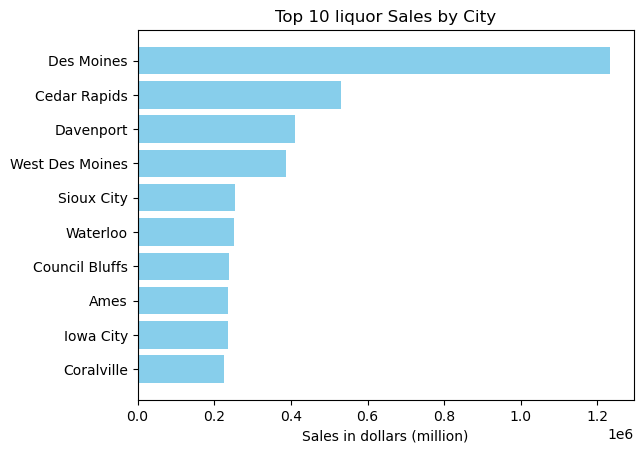

In [31]:
sorted_citysales = top_10_CitySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_citysales.index[::-1], sorted_citysales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by City')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

###

#### County VS Sales

In [33]:
county_sales = subset_df.groupby('county')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CountySales = county_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 County by Total Sales:")
print(top_10_CountySales)

Top 10 County by Total Sales:
county
Allamakee     2022931.05
Black hawk     840140.37
Buena vist     587080.05
Butler         512543.26
Carroll        434757.33
Adair          291884.36
Guthrie        268386.21
Clay           267761.29
Lyon           253754.57
Floyd          173467.37
Name: sale_dollars, dtype: float64


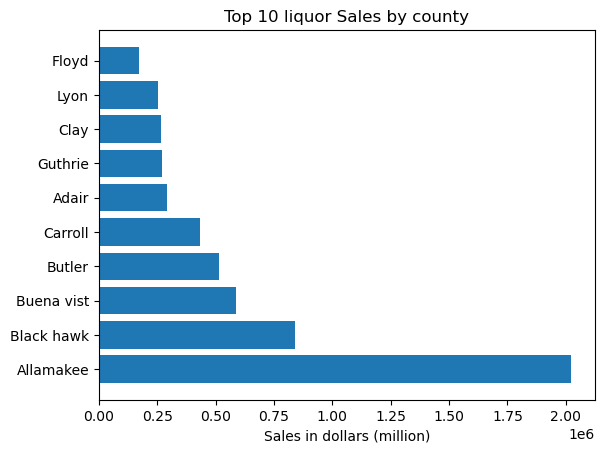

In [35]:
plt.figure()
plt.barh(top_10_CountySales.index, top_10_CountySales.values)  
plt.title('Top 10 liquor Sales by county')
plt.xlabel('Sales in dollars (million)')  
plt.yticks(rotation=0) 
plt.show()

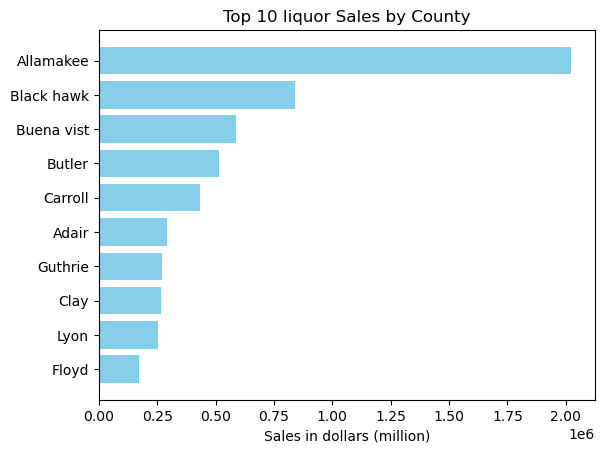

In [36]:
sorted_CountySales = top_10_CountySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_CountySales.index[::-1], sorted_CountySales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by County')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

### Vendor VS Sales

In [37]:
Vendor_sales = subset_df.groupby('vendor_name')['sale_dollars'].sum()

top_10_vendorSales = Vendor_sales.sort_values(ascending=False).head(10)

top_10_vendorSales

vendor_name
DIAGEO AMERICAS         1546809.99
SAZERAC COMPANY  INC    1020476.72
FIFTH GENERATION INC     757243.55
Heaven Hill Brands       614957.38
Jim Beam Brands          578314.64
PERNOD RICARD USA        507670.71
BACARDI USA INC          472117.00
LUXCO INC                369871.61
Brown Forman Corp.       352828.20
PROXIMO                  258325.73
Name: sale_dollars, dtype: float64

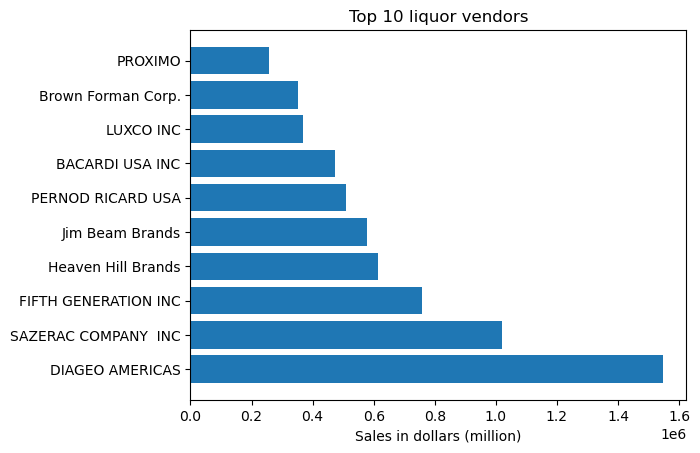

In [39]:
plt.figure()
plt.barh(top_10_vendorSales.index, top_10_vendorSales.values) 
plt.title('Top 10 liquor vendors')
plt.xlabel('Sales in dollars (million)')  
plt.yticks(rotation=0)  
plt.show()

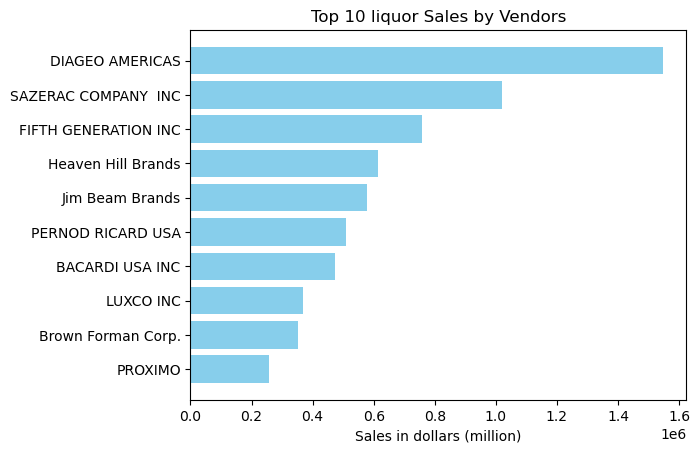

In [40]:
sorted_vendorSales = top_10_vendorSales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_vendorSales.index[::-1], sorted_vendorSales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by Vendors')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

In [108]:
#Make a copy of subset just in case
subset1_df=subset_df

###

 ### Correlation

In [122]:
%matplotlib inline

C:\Users\hp\AppData\Local\Temp\ipykernel_14724\4275629704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset_df.corr().round(2)


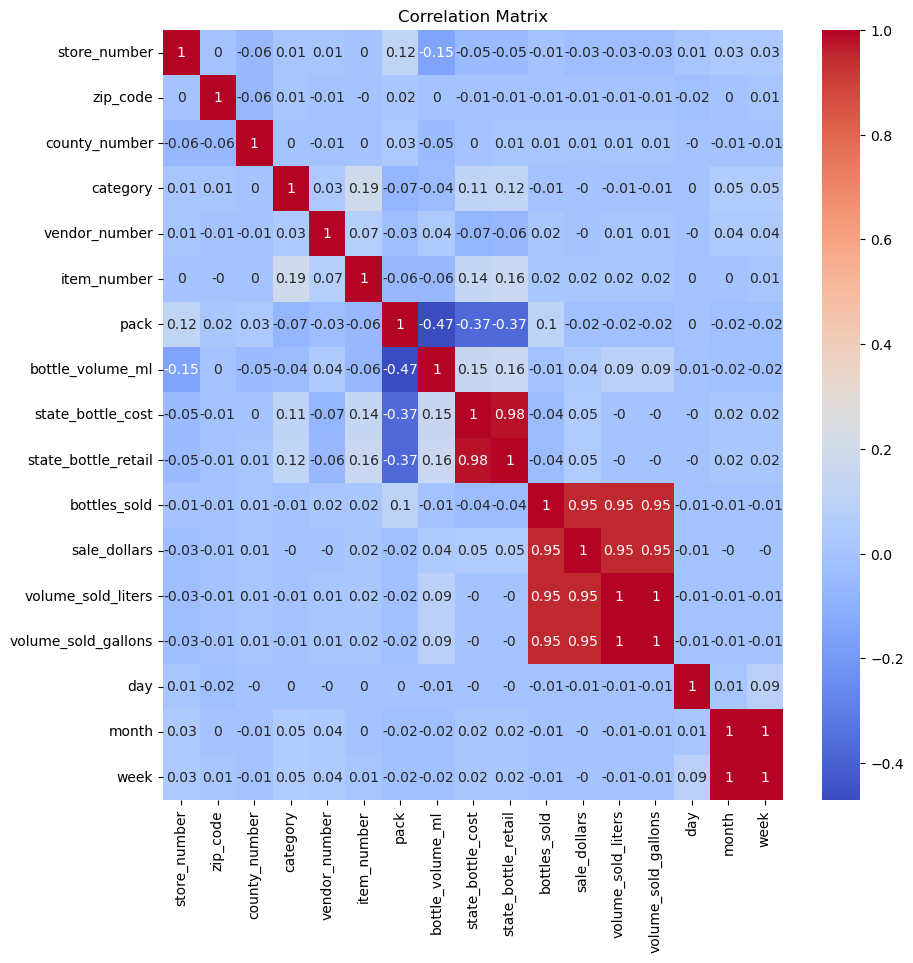

In [41]:
plt.figure(figsize=(10, 10))
corr_matrix = subset_df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We need to drop one column for each pair with correlation of 1 to fit our models.  We need to avovid perfect multicollinearity in linear regression models.
Correlation=1 means that this column is perfectly correlated with another column in the dataset. In other words, the two columns provide exactly the same information.

Since volume_sold_liters have high correlation with sale, we would change it to dummy variables in order to keep it for modelling.

Next Notebook is feature engineering.

In [ ]:
END